This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-MEDIUM-ITFW'
#MESH = 'TRI03-INTERMEDIATE-ITFW'
#MESH = 'TRI03-FINE-ITFW'
#MESH = 'TRI03-SUPERFINE-ITFW'
#MESH = 'TRI03-MEGAFINE-ITFW'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-MEDIUM-ITFW'
#MESH = 'TRI06-INTERMEDIATE-ITFW'
#MESH = 'TRI06-FINE-ITFW'
#MESH = 'TRI06-SUPERFINE-ITFW'
MESH = 'TRI06-MEGAFINE-ITFW'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-SUPERFINE-ITFW'


###### LINEAR QUADRILATERAL ELEMENT MESH
#MESH = 'QUA04-MEDIUM-ITFW'
#MESH = 'QUA04-INTERMEDIATE-ITFW'
#MESH = 'QUA04-FINE-ITFW'
#MESH = 'QUA04-SUPERFINE-ITFW'
#MESH = 'QUA04-MEGAFINE-ITFW'

###### QUADRATIC QUADRILATERAL ELEMENT MESH
#MESH = 'QUA09-MEDIUM-ITFW'
#MESH = 'QUA09-INTERMEDIATE-ITFW'
#MESH = 'QUA09-FINE-ITFW'
#MESH = 'QUA09-SUPERFINE-ITFW'
#MESH = 'QUA09-MEGAFINE-ITFW'


# RECTANGULAR MESH
#MESH = 'TRI03-FINE-RECTANGLE'
#MESH = 'TRI06-MEDIUM-RECTANGLE'

#MESH = 'TRI10-MEGAFINE-LINEAR'

In [2]:
##CREATE GRAD-SHAFRANOV PROBLEM WITH CHOSEN MESH
Problem = GradShafranovSolver(MESH)

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
READ MESH FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
Done!


In [3]:
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Problem.FIXED_BOUNDARY = False
Problem.GhostStabilization = True

##### OUTPUT PLOTS IN RUNTIME
Problem.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Problem.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Problem.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Problem.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Problem.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

In [4]:
# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Problem.QuadratureOrder2D = 8   # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Problem.EXT_ITER = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Problem.EXT_TOL = 1.0e-3        # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Problem.INT_ITER = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Problem.INT_TOL = 1.0e-4        # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Problem.PLASMA_IT = 0           # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Problem.beta = 1.0e6            # NITSCHE'S METHOD PENALTY PARAMETER
Problem.zeta = 1.0e-2           # GHOST PENALTY PARAMETER
Problem.PSIrelax = False
Problem.alphaPSI = 1.0          # INITIAL AIKITEN'S RELAXATION PARAMETER
Problem.PHIrelax = False
Problem.alphaPHI = 0.5
Problem.EXTR_R0 = 6.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.EXTR_Z0 = 1.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.SADD_R0 = 5.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.SADD_Z0 = -3.5          # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.OPTI_ITMAX = 50         # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Problem.OPTI_TOL = 1.0e-6       # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

In [5]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(index = 1,
             dim = Problem.dim,
             X = np.array([3.9431,7.5741]),
             I = 5.73e6)
coil2 = Coil(index = 2,
             dim = Problem.dim,
             X = np.array([8.2851,6.5398]),
             I = -2.88e6)
coil3 = Coil(index = 3,
             dim = Problem.dim,
             X = np.array([11.9919,3.2752]),
             I = -5.81e6)
coil4 = Coil(index = 4,
             dim = Problem.dim,
             X = np.array([11.9630,-2.2336]),
             I = -4.78e6)
coil5 = Coil(index = 5,
             dim = Problem.dim,
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e6)
coil6 = Coil(index = 6,
             dim = Problem.dim,
             X = np.array([4.3340, -7.4665]),
             I = 16.94e6)
Problem.COILS = [coil1, coil2, coil3, coil4, coil5, coil6]
   
# SOLENOIDS
solenoid1 = Solenoid(index = 1,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -5.415],
                                    [1.696, -3.6067]]),
                     I = 5.3e6,
                     Nturns = 1)
solenoid2 = Solenoid(index = 2,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -3.6067],
                                    [1.696, -1.7983]]),
                     I = -10.3e6,
                     Nturns = 1)
solenoid3 = Solenoid(index = 3,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -1.7983],
                                    [1.696, 0.0]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid4 = Solenoid(index = 4,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 0.0],
                                    [1.696, 1.8183]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid5 = Solenoid(index = 5,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 1.8183],
                                    [1.696, 3.6267]]),
                     I = -4.05e6,
                     Nturns = 1)
solenoid6 = Solenoid(index = 6,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 3.6267],
                                    [1.696, 5.435]]),
                     I = -4.82e6,
                     Nturns = 1)
Problem.SOLENOIDS = [solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

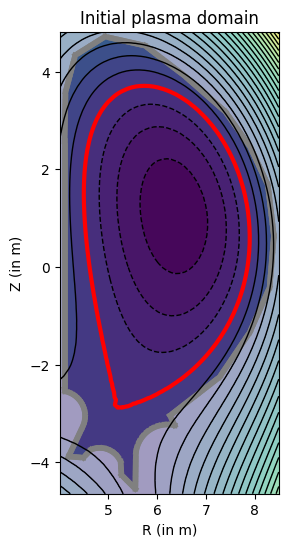

In [6]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

"""
X_SADDLE = np.array([5.2, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])
"""

"""
X_SADDLE = np.array([5.4, -2.9])
X_RIGHT = np.array([7.8, 0.4])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.4])
"""

X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Problem.initialPHI.Plot()

In [7]:
Problem.InitialiseMESH()

PREPROCESS MESH AND INITIALISE MESH ITEMS...
     -> INITIALISE SIMULATION PARAMETERS...Done!
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.004399748165324323 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1005513372441991 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·39.78067432644476
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
Done!


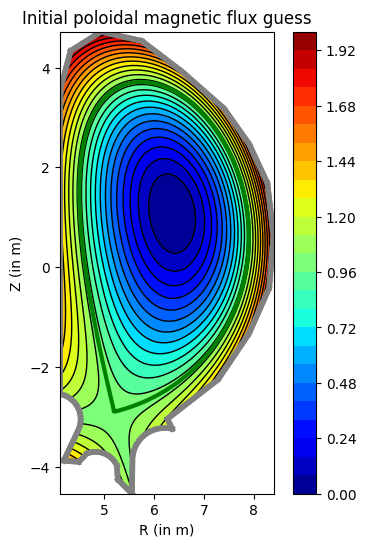

In [8]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

"""
X_SADDLE = np.array([5.2, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])
"""

"""
X_SADDLE = np.array([5.4, -2.9])
X_RIGHT = np.array([7.8, 0.4])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.4])
"""

X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])


X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""


Problem.initialPSI.Plot()

In [9]:
Problem.InitialisePSI()

     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!


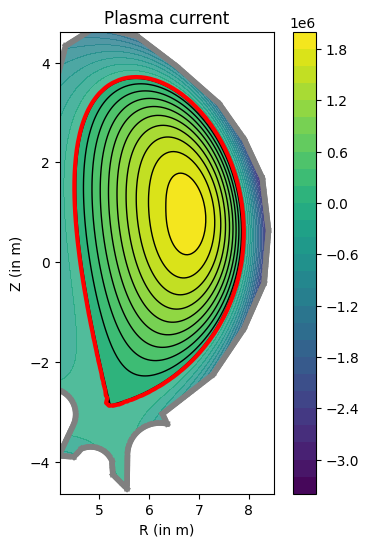

In [10]:
### DEFINE PLASMA CURRENT MODEL

# LINEAR MODEL
"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# ZHENG MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'ZHENG',   # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# NONLINEAR MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'NONLINEAR', # PREDEFINED MODEL
                                     R0 = 6.0)            # MEAN RADIUS
"""


# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Problem.mu0*(R0**2)*q0*kappa)

"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

Problem.IntegratePlasmaDomain(Problem.PlasmaCurrent.Jphi)

Problem.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE SIMULATION ARRAYS ...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
     -> ASSIGN INITIAL BOUNDARY VALUES...Done!
Done!


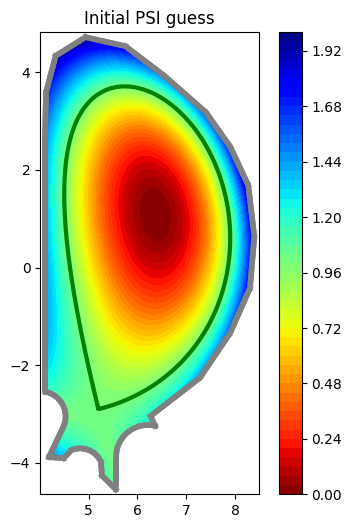

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999981
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.45614232, 0.81084489]), -10.584161282353215, 2212)]
Xpoint =  [(array([ 5.01051644, -3.14868828]), 0.8222649036245137, 3504)]
LOCAL EXTREMUM AT  [6.45614232 0.81084489]  (ELEMENT  2212 ) WITH VALUE PSI_0 =  -10.584161282353215
SADDLE POINT AT  [ 5.01051644 -3.14868828]  (ELEMENT  3504 ) WITH VALUE PSI_X =  0.8222649036245137


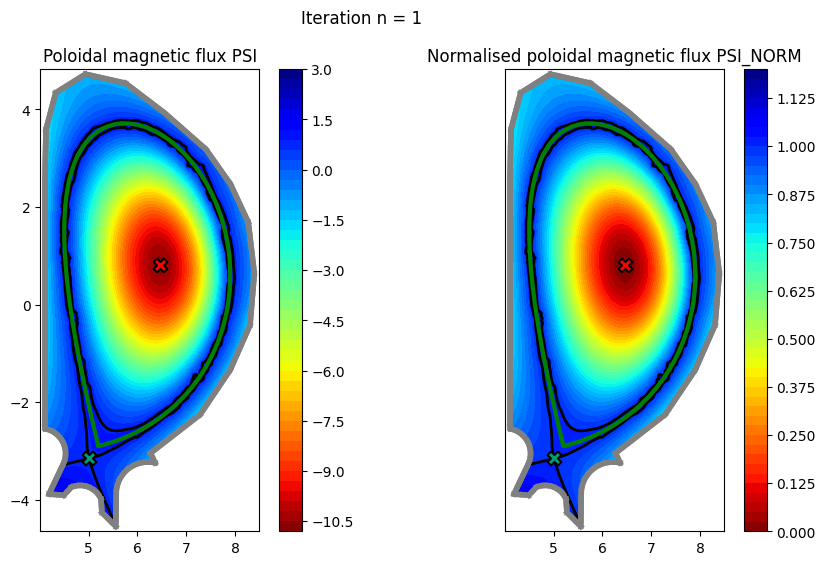

Internal iteration =  1 , PSI_NORM residu =  0.3614006438846283
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  15000000.000000075
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.49295815, 0.73174413]), -12.802623307085565, 1912)]
Xpoint =  [(array([ 5.04967946, -3.11894063]), 0.8218738835742627, 3494)]
LOCAL EXTREMUM AT  [6.49295815 0.73174413]  (ELEMENT  1912 ) WITH VALUE PSI_0 =  -12.802623307085565
SADDLE POINT AT  [ 5.04967946 -3.11894063]  (ELEMENT  3494 ) WITH VALUE PSI_X =  0.8218738835742627


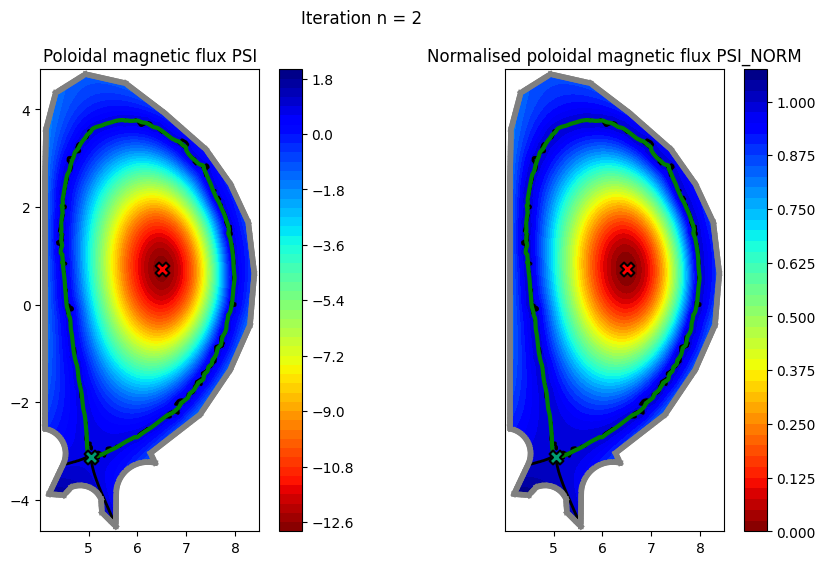

Internal iteration =  2 , PSI_NORM residu =  0.038160385205946425
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  15000000.0000001
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.50933456, 0.69693513]), -12.30345154276252, 1909)]
Xpoint =  [(array([ 5.05725878, -3.11714167]), 0.8214480547592886, 3494)]
LOCAL EXTREMUM AT  [6.50933456 0.69693513]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.30345154276252
SADDLE POINT AT  [ 5.05725878 -3.11714167]  (ELEMENT  3494 ) WITH VALUE PSI_X =  0.8214480547592886


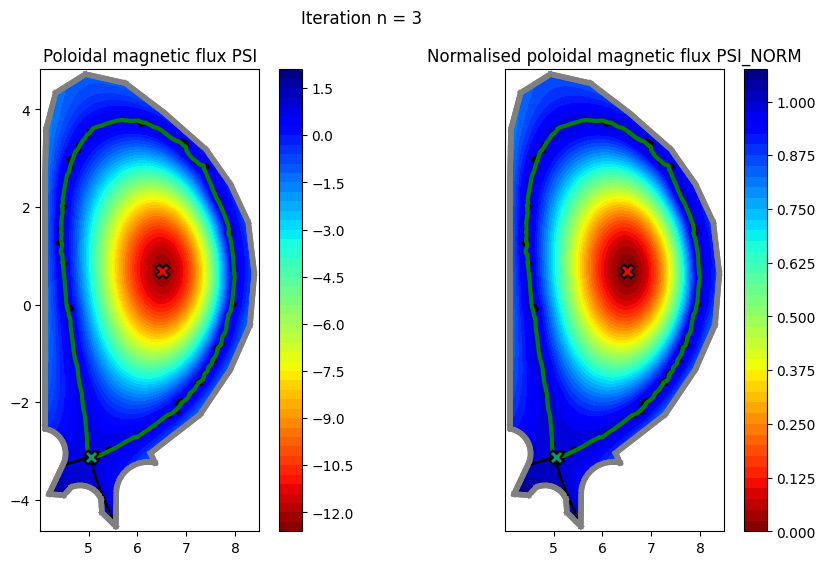

Internal iteration =  3 , PSI_NORM residu =  0.008780184167480033
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  14999999.999999816
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51487321, 0.68000487]), -12.271159961483203, 1909)]
Xpoint =  [(array([ 5.05913703, -3.11654738]), 0.8210060939399155, 3494)]
LOCAL EXTREMUM AT  [6.51487321 0.68000487]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.271159961483203
SADDLE POINT AT  [ 5.05913703 -3.11654738]  (ELEMENT  3494 ) WITH VALUE PSI_X =  0.8210060939399155


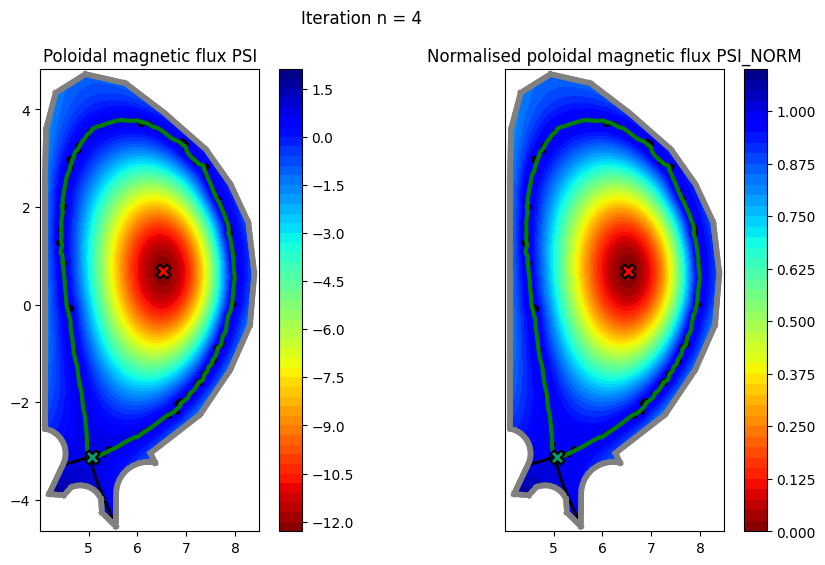

Internal iteration =  4 , PSI_NORM residu =  0.003540135936478131
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  14999999.9999997
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51660967, 0.67167552]), -12.270073741283808, 1909)]
Xpoint =  [(array([ 5.06046796, -3.11608238]), 0.820553928980061, 3494)]
LOCAL EXTREMUM AT  [6.51660967 0.67167552]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.270073741283808
SADDLE POINT AT  [ 5.06046796 -3.11608238]  (ELEMENT  3494 ) WITH VALUE PSI_X =  0.820553928980061


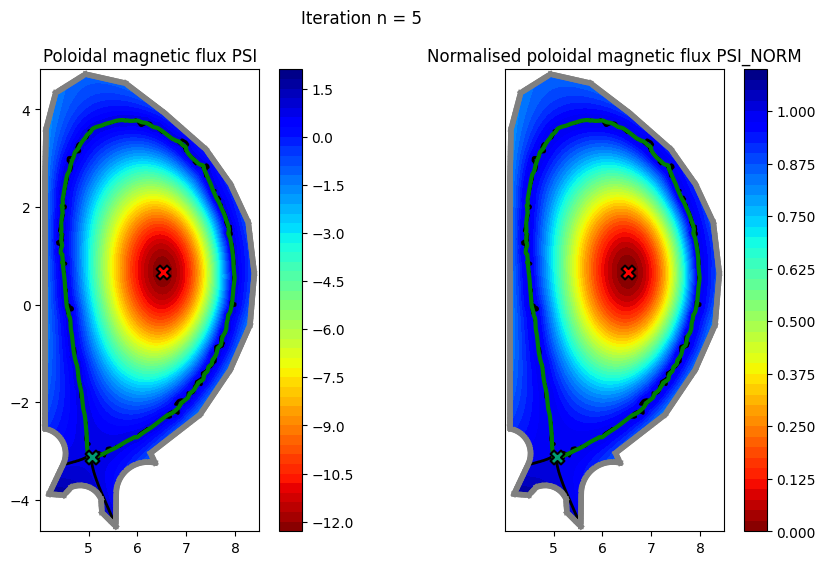

Internal iteration =  5 , PSI_NORM residu =  0.0016392782241089578
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  14999999.99999968
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51716298, 0.6675921 ]), -12.27103600558478, 1909)]
Xpoint =  [(array([ 5.06166147, -3.11564568]), 0.8200943649370029, 3494)]
LOCAL EXTREMUM AT  [6.51716298 0.6675921 ]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.27103600558478
SADDLE POINT AT  [ 5.06166147 -3.11564568]  (ELEMENT  3494 ) WITH VALUE PSI_X =  0.8200943649370029


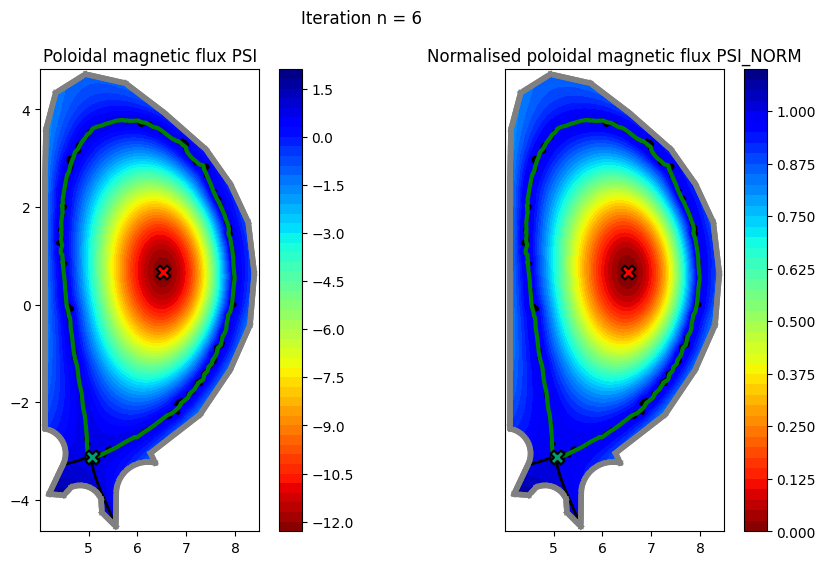

Internal iteration =  6 , PSI_NORM residu =  0.0007825772354146892
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  15000000.000000171
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.5173486, 0.6655985]), -12.27172685600701, 1909)]
Xpoint =  [(array([ 5.06281041, -3.11521347]), 0.8196287736904146, 3494)]
LOCAL EXTREMUM AT  [6.5173486 0.6655985]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.27172685600701
SADDLE POINT AT  [ 5.06281041 -3.11521347]  (ELEMENT  3494 ) WITH VALUE PSI_X =  0.8196287736904146


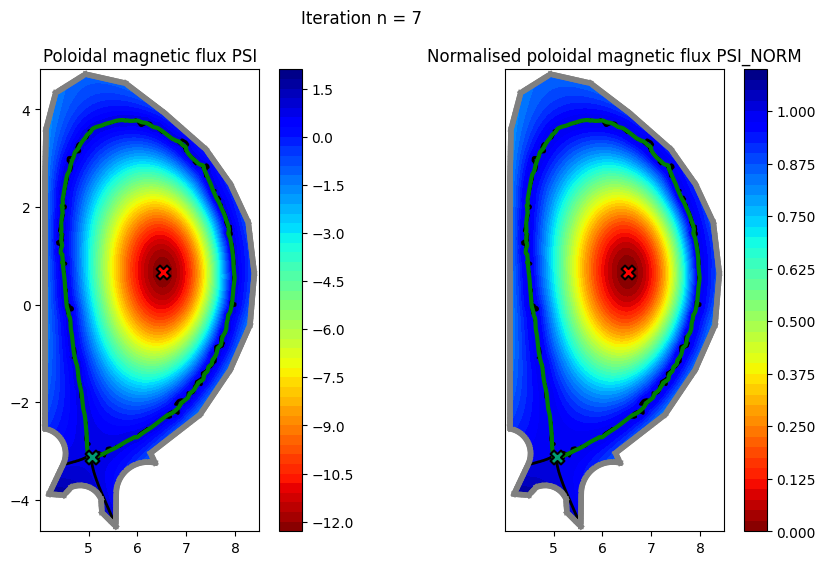

Internal iteration =  7 , PSI_NORM residu =  0.0003778209223087069
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  15000000.000000056
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51741509, 0.66462806]), -12.27222838953309, 1909)]
Xpoint =  [(array([ 5.06395662, -3.11477377]), 0.8191578564633835, 3494)]
LOCAL EXTREMUM AT  [6.51741509 0.66462806]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.27222838953309
SADDLE POINT AT  [ 5.06395662 -3.11477377]  (ELEMENT  3494 ) WITH VALUE PSI_X =  0.8191578564633835


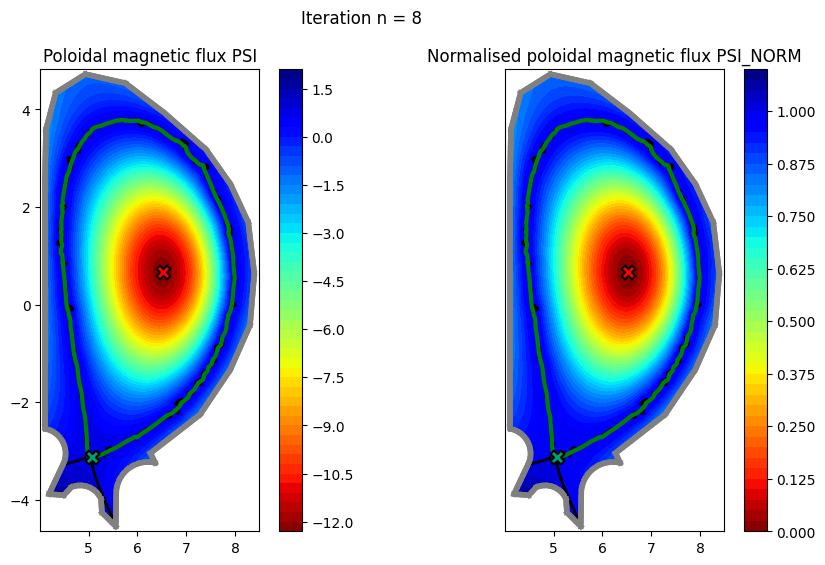

Internal iteration =  8 , PSI_NORM residu =  0.0001836455390401626
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  15000000.000000052
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51744058, 0.66415641]), -12.272679929489954, 1909)]
Xpoint =  [(array([ 5.06512388, -3.11431836]), 0.8186819757324174, 3494)]
LOCAL EXTREMUM AT  [6.51744058 0.66415641]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.272679929489954
SADDLE POINT AT  [ 5.06512388 -3.11431836]  (ELEMENT  3494 ) WITH VALUE PSI_X =  0.8186819757324174


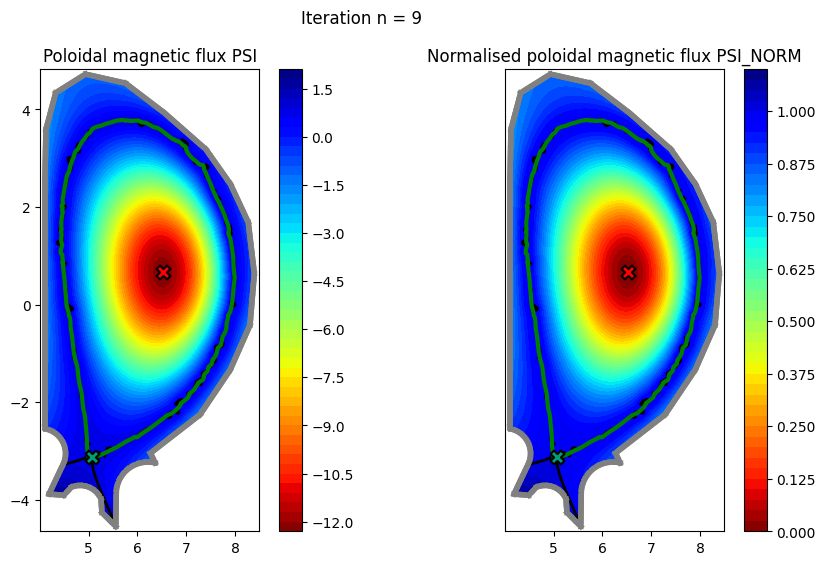

Internal iteration =  9 , PSI_NORM residu =  9.039402602232194e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  1 , PSI_B residu =  0.5119033569532809
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  14999999.999999886
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51753019, 0.66415218]), -12.272372334550923, 1909)]
Xpoint =  [(array([ 4.9502648 , -2.84087055]), 0.8168968587475013, 3537)]
LOCAL EXTREMUM AT  [6.51753019 0.66415218]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.272372334550923
SADDLE POINT AT  [ 4.9502648  -2.84087055]  (ELEMENT  3537 ) WITH VALUE PSI_X =  0.8168968587475013


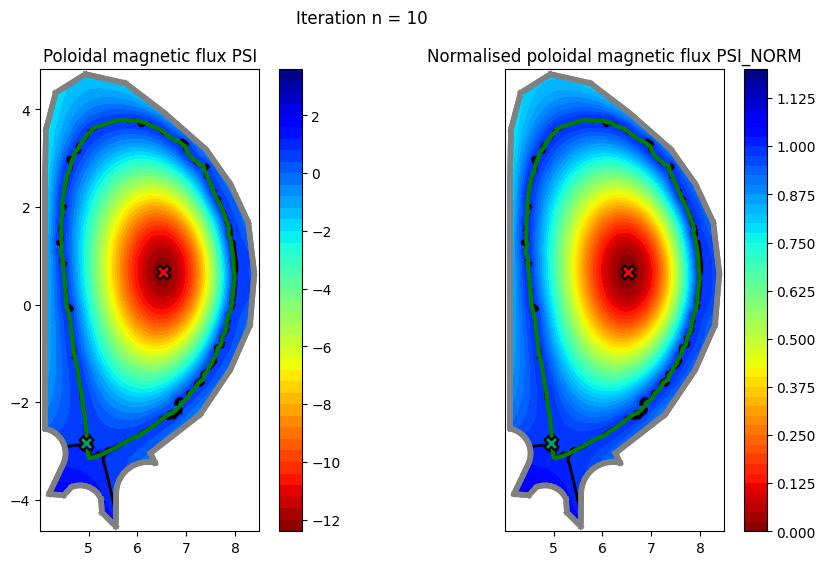

Internal iteration =  1 , PSI_NORM residu =  0.022947669724227057
 


ZeroDivisionError: float division by zero

In [11]:
## NAME SIMULATION CASE 
CASE = 'TS-FREE-APEC-ITFW'

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI(CASE)

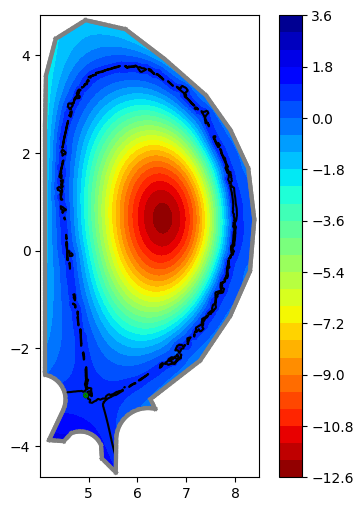

In [12]:
Problem.PlotPSI()

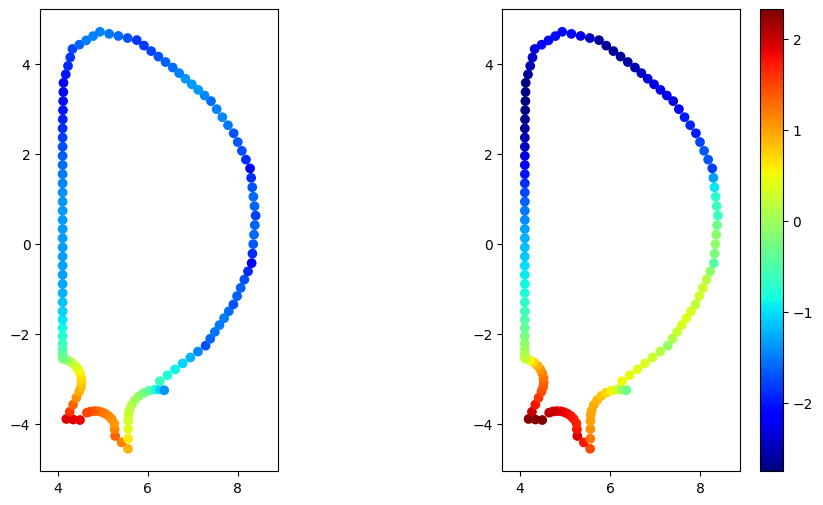

In [ ]:
self = Problem

cmap = plt.get_cmap('jet')

norm = plt.Normalize(np.min([self.PSI_B_sim[0].min(),self.PSI_B_sim[1].min()]),np.max([self.PSI_B_sim[0].max(),self.PSI_B_sim[1].max()]))

fig, axs = plt.subplots(1, 2, figsize=(11,6))
axs[0].set_aspect('equal')
axs[0].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[0].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors0 = cmap(norm(self.PSI_B_sim[0]))
axs[0].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors0)

axs[1].set_aspect('equal')
axs[1].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[1].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors1 = cmap(norm(self.PSI_B_sim[1]))
axs[1].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=axs[1])
